In [ ]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

## Faithfulness

We describe a dataset as "faithful" if we believe it accurately captures reality. Typically, untrustworthy datasets contain:

**Unrealistic or incorrect values**

For example, dates in the future, locations that don't exist, negative counts, or large outliers.

**Violations of obvious dependencies**

For example, age and birthday for individuals don't match.

**Hand-entered data**

As we have seen, these are typically filled with spelling errors and inconsistencies.

**Clear signs of data falsification**

For example, repeated names, fake looking email addresses, or repeated use of uncommon names or fields.

Notice the many similarities to data cleaning. As we have mentioned, we often go back and forth between data cleaning and EDA, especially when determining data faithfulness. For example, visualizations often help us identify strange entries in the data.

In [2]:
calls = pd.read_csv('data/calls.csv')
calls.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,...,BLKADDR,Latitude,Longitude,Day
0,17091420,BURGLARY AUTO,07/23/2017 12:00:00 AM,06:00,...,2500 LE CONTE AVE,37.876965,-122.260544,Sunday
1,17038302,BURGLARY AUTO,07/02/2017 12:00:00 AM,22:00,...,BOWDITCH STREET & CHANNING WAY,37.867209,-122.256554,Sunday
2,17049346,THEFT MISD. (UNDER $950),08/20/2017 12:00:00 AM,23:20,...,2900 CHANNING WAY,37.867948,-122.250664,Sunday
3,17091319,THEFT MISD. (UNDER $950),07/09/2017 12:00:00 AM,04:15,...,2100 RUSSELL ST,37.856719,-122.266672,Sunday
4,17044238,DISTURBANCE,07/30/2017 12:00:00 AM,01:16,...,TELEGRAPH AVENUE & DURANT AVE,37.867816,-122.258994,Sunday


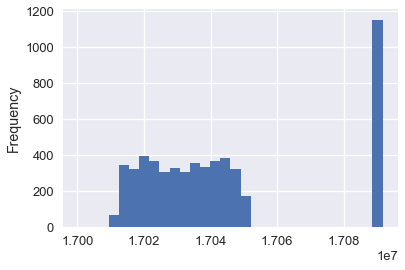

In [11]:
calls['CASENO'].plot.hist(bins=30)

Notice the unexpected clusters at 17030000 and 17090000. By plotting the distribution of case numbers, we can quickly see anomalies in the data. In this case, we might guess that two different teams of police use different sets of case numbers for their calls.

Exploring the data often reveals anomalies; if fixable, we can then apply data cleaning techniques.